In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [3]:
params = {
    'legend.fontsize': 'large',
    'figure.figsize': (16, 4), # 2.2*len(csvs)
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'xtick.major.size': 7.0,
    'ytick.major.size': 3.0
}
pylab.rcParams.update(params)

In [95]:
def plot_df(ax, df, configs, title, error_field='test_kl', ylabel=''):
    reds = plt.get_cmap('RdPu')(np.linspace(0.6, 1, 4))
    
    for i, config in enumerate(configs):
        poly_sketch = df[(df['method'] == config['method'])]
        poly_sketch = poly_sketch[(poly_sketch['proj'] == config['proj']) & (poly_sketch['comp'] == config['comp'])].groupby('D').agg(['mean'])
        
        x_vals = poly_sketch['feature_time']['mean'].values + poly_sketch['pred_time']['mean'].values
        y_vals = poly_sketch[error_field]['mean'].values
        labels = ['{}d'.format(i+1) for i in range(len(poly_sketch.index.values))]
        
        ax.plot(
            x_vals,
            y_vals,
            label=config['label'],
            c=config['color'],
            linewidth=2,
            linestyle='dashed' if config['comp'] else 'solid',
            marker='x',
            markersize=12
        )
        
        for i, (label, x, y) in enumerate(zip(labels, x_vals, y_vals)):
            if config['proj'] == 'srht':
                if not config['comp']:
                    if i % 2 == 0:
                        continue
                    ax.text(x+1, y+0.05*y_vals[0], label, c=config['color'], fontsize='x-large') # arrowprops=dict(facecolor='black', shrink=0.05)
                else:
                    ax.text(x-1.5, y-0.2*y_vals[0], label, c=config['color'], fontsize='x-large')
        # ax.set_xlabel('Time [seconds]')
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)

In [96]:
configs = [
    {'method': 'poly_sketch', 'proj': 'rademacher', 'comp': False, 'label': 'Rademacher', 'color': 'orange'},
    {'method': 'poly_sketch', 'proj': 'rademacher', 'comp': True, 'label': 'Rademacher Comp.', 'color': 'orange'},
    {'method': 'poly_sketch', 'proj': 'srht', 'comp': False, 'label': 'TensorSRHT', 'color': 'blue'},
    {'method': 'poly_sketch', 'proj': 'srht', 'comp': True, 'label': 'TensorSRHT Comp.','color': 'blue'},
#     {'method': 'maclaurin', 'proj': 'rademacher', 'comp': False, 'label': 'ML Rademacher', 'color': 'orange'},
#     {'method': 'maclaurin', 'proj': 'rademacher', 'comp': True, 'label': 'ML Rademacher Comp.', 'color': 'orange'},
#     {'method': 'maclaurin', 'proj': 'srht', 'comp': False, 'label': 'ML TensorSRHT', 'color': 'blue'},
#     {'method': 'maclaurin', 'proj': 'srht', 'comp': True, 'label': 'ML TensorSRHT Comp.','color': 'blue'}
]
err = 'test_kl'

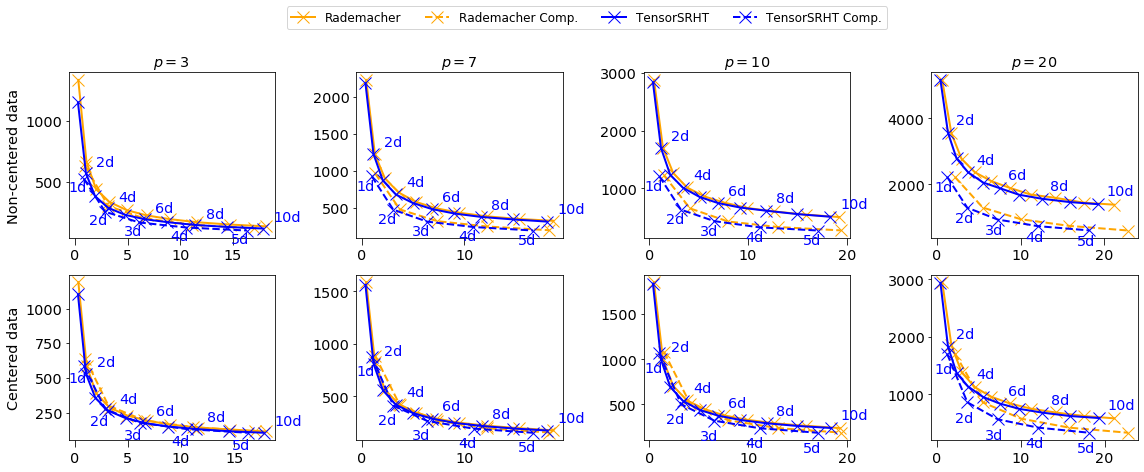

In [97]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16, 6))
plot_df(axs[0,0], pd.read_csv('../csv/poly3_approx/FashionMNIST_d1024_n70000.csv'), configs, error_field=err, title=r'$p=3$', ylabel='Non-centered data')
plot_df(axs[0,1], pd.read_csv('../csv/poly7_approx/FashionMNIST_d1024_n70000.csv'), configs, error_field=err, title=r'$p=7$')
plot_df(axs[0,2], pd.read_csv('../csv/poly10_approx/FashionMNIST_d1024_n70000.csv'), configs, error_field=err, title=r'$p=10$')
plot_df(axs[0,3], pd.read_csv('../csv/poly20_approx/FashionMNIST_d1024_n70000.csv'), configs, error_field=err, title=r'$p=20$')

plot_df(axs[1,0], pd.read_csv('../csv/poly3_approx_0mean/FashionMNIST_d1024_n70000.csv'), configs, error_field=err, title=r'', ylabel='Centered data')
plot_df(axs[1,1], pd.read_csv('../csv/poly7_approx_0mean/FashionMNIST_d1024_n70000.csv'), configs, error_field=err, title=r'')
plot_df(axs[1,2], pd.read_csv('../csv/poly10_approx_0mean/FashionMNIST_d1024_n70000.csv'), configs, error_field=err, title=r'')
plot_df(axs[1,3], pd.read_csv('../csv/poly20_approx_0mean/FashionMNIST_d1024_n70000.csv'), configs, error_field=err, title=r'')

plt.tight_layout()
handles, labels = axs[0,0].get_legend_handles_labels()
legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=4, bbox_to_anchor = (0,0.25,1.025,0.85), bbox_transform=plt.gcf().transFigure)
plt.savefig('../figures/kl_div_time.pdf', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')